In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("poster")

mpl.rcParams['figure.figsize'] = [8.0*2, 6.0*2]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 30
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'


# Introduction

On fait des plots sur les runs

In [3]:
from problem.workflow import pprint

# Data

In [4]:
from problem.fashion_mnist import load_data

In [5]:
X, y = load_data()

# Load models

In [6]:
from problem.fashion_mnist import get_save_directory
from problem.fashion_mnist import preprocessing
from problem.fashion_mnist import skew
from problem.fashion_mnist import tangent
from problem.fashion_mnist import get_cv_iter

# from main import get_data_shape

In [7]:
def load_models(model_class, *args, **kwargs):
    models = []
    cv_iter = get_cv_iter(X, y)
    n_cv = len(cv_iter)
    pprint('Loading', n_cv, model_class.__name__)
    for i in range(n_cv):
        model = model_class(*args, **kwargs)
        save_directory = get_save_directory()
        model_name = '{}-{}'.format(model.get_name(), i)
        path = os.path.join(save_directory, model_name)
        model.load(path)
        models.append(model)
    return models

In [8]:
from models.fashion_mnist import NeuralNetModel
from models.fashion_mnist import AugmentedNeuralNetModel
from models.fashion_mnist import TangentPropModel
from models.fashion_mnist import AugmentedTangentPropModel
from models.fashion_mnist import PivotModel


# Test submission

In [9]:
from problem.fashion_mnist import test_submission


In [10]:
def get_mean_std(df_list):
    z = df_list[0]['z']
    acc = np.concatenate([df['accuracy'].values.reshape(-1, 1) for df in df_list], axis=1)
    mean_acc = np.mean(acc, axis=1)
    std_acc = np.std(acc, axis=1)
    return mean_acc, std_acc

In [11]:
# z_list = list(range(-50, 51, 10)) + list(range(-5, 6, 1))
# z_list = sorted(z_list)
z_list = np.linspace(-10, 10, num=11)

print(z_list)

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]


In [12]:
NN_models = load_models(NeuralNetModel, n_steps=10000, batch_size=128, cuda=True)
df_list = test_submission(NN_models, X, y, z_list=z_list)
NN_mean_acc, NN_std_acc = get_mean_std(df_list)


2018-02-13 16:19:21 Loading 12 NeuralNetModel
2018-02-13 16:19:25 testing model 1/12
2018-02-13 16:19:46 testing model 2/12
2018-02-13 16:20:07 testing model 3/12
2018-02-13 16:20:27 testing model 4/12
2018-02-13 16:20:48 testing model 5/12
2018-02-13 16:21:09 testing model 6/12
2018-02-13 16:21:29 testing model 7/12
2018-02-13 16:21:50 testing model 8/12
2018-02-13 16:22:11 testing model 9/12
2018-02-13 16:22:32 testing model 10/12
2018-02-13 16:22:54 testing model 11/12
2018-02-13 16:23:14 testing model 12/12
2018-02-13 16:23:35 Done.


In [13]:
TP_L0_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.0, 
                           batch_size=128, n_steps=10000, cuda=True)
df_list = test_submission(TP_L0_models, X, y, z_list=z_list)
TP_L0_mean_acc, TP_L0_std_acc = get_mean_std(df_list)


2018-02-13 16:23:35 Loading 12 TangentPropModel
2018-02-13 16:23:35 testing model 1/12
2018-02-13 16:23:57 testing model 2/12
2018-02-13 16:24:18 testing model 3/12
2018-02-13 16:24:40 testing model 4/12
2018-02-13 16:25:00 testing model 5/12
2018-02-13 16:25:22 testing model 6/12
2018-02-13 16:25:43 testing model 7/12
2018-02-13 16:26:03 testing model 8/12
2018-02-13 16:26:24 testing model 9/12
2018-02-13 16:26:45 testing model 10/12
2018-02-13 16:27:06 testing model 11/12
2018-02-13 16:27:26 testing model 12/12
2018-02-13 16:27:47 Done.


In [15]:
TP_L001_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.01, 
                             batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_L001_models, X, y, z_list=z_list)
TP_L001_mean_acc, TP_L001_std_acc = get_mean_std(df_list)


2018-02-13 16:31:55 Loading 12 TangentPropModel
2018-02-13 16:31:56 testing model 1/12
2018-02-13 16:32:16 testing model 2/12
2018-02-13 16:32:37 testing model 3/12
2018-02-13 16:32:58 testing model 4/12
2018-02-13 16:33:18 testing model 5/12
2018-02-13 16:33:39 testing model 6/12
2018-02-13 16:34:01 testing model 7/12
2018-02-13 16:34:22 testing model 8/12
2018-02-13 16:34:44 testing model 9/12
2018-02-13 16:35:05 testing model 10/12
2018-02-13 16:35:27 testing model 11/12
2018-02-13 16:35:49 testing model 12/12
2018-02-13 16:36:11 Done.


In [14]:
TP_L01_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.1, 
                            batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_L01_models, X, y, z_list=z_list)
TP_L01_mean_acc, TP_L01_std_acc = get_mean_std(df_list)


2018-02-13 16:27:47 Loading 12 TangentPropModel
2018-02-13 16:27:47 testing model 1/12
2018-02-13 16:28:09 testing model 2/12
2018-02-13 16:28:29 testing model 3/12
2018-02-13 16:28:49 testing model 4/12
2018-02-13 16:29:10 testing model 5/12
2018-02-13 16:29:30 testing model 6/12
2018-02-13 16:29:52 testing model 7/12
2018-02-13 16:30:12 testing model 8/12
2018-02-13 16:30:32 testing model 9/12
2018-02-13 16:30:53 testing model 10/12
2018-02-13 16:31:13 testing model 11/12
2018-02-13 16:31:34 testing model 12/12
2018-02-13 16:31:55 Done.


In [16]:
TP_L1_models = load_models(TangentPropModel, skewing_function=skew, trade_off=1.0, 
                           batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_L1_models, X, y, z_list=z_list)
TP_L1_mean_acc, TP_L1_std_acc = get_mean_std(df_list)


2018-02-13 16:36:11 Loading 12 TangentPropModel
2018-02-13 16:36:12 testing model 1/12
2018-02-13 16:36:34 testing model 2/12
2018-02-13 16:36:56 testing model 3/12
2018-02-13 16:37:17 testing model 4/12
2018-02-13 16:37:39 testing model 5/12
2018-02-13 16:38:00 testing model 6/12
2018-02-13 16:38:20 testing model 7/12
2018-02-13 16:38:41 testing model 8/12
2018-02-13 16:39:01 testing model 9/12
2018-02-13 16:39:22 testing model 10/12
2018-02-13 16:39:44 testing model 11/12
2018-02-13 16:40:05 testing model 12/12
2018-02-13 16:40:26 Done.


In [17]:
TP_L10_models = load_models(TangentPropModel, skewing_function=skew, trade_off=10.0, 
                            batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_L10_models, X, y, z_list=z_list)
TP_L10_mean_acc, TP_L10_std_acc = get_mean_std(df_list)


2018-02-13 16:40:26 Loading 12 TangentPropModel
2018-02-13 16:40:26 testing model 1/12
2018-02-13 16:40:48 testing model 2/12
2018-02-13 16:41:08 testing model 3/12
2018-02-13 16:41:29 testing model 4/12
2018-02-13 16:41:49 testing model 5/12
2018-02-13 16:42:10 testing model 6/12
2018-02-13 16:42:30 testing model 7/12
2018-02-13 16:42:51 testing model 8/12
2018-02-13 16:43:11 testing model 9/12
2018-02-13 16:43:32 testing model 10/12
2018-02-13 16:43:53 testing model 11/12
2018-02-13 16:44:14 testing model 12/12
2018-02-13 16:44:35 Done.


In [19]:
TP_L100_models = load_models(TangentPropModel, skewing_function=skew, trade_off=100.0, 
                            batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_L100_models, X, y, z_list=z_list)
TP_L100_mean_acc, TP_L100_std_acc = get_mean_std(df_list)


2018-02-13 16:50:09 Loading 12 TangentPropModel
2018-02-13 16:50:09 testing model 1/12
2018-02-13 16:50:31 testing model 2/12
2018-02-13 16:50:52 testing model 3/12
2018-02-13 16:51:13 testing model 4/12
2018-02-13 16:51:34 testing model 5/12
2018-02-13 16:51:56 testing model 6/12
2018-02-13 16:52:17 testing model 7/12
2018-02-13 16:52:38 testing model 8/12
2018-02-13 16:52:59 testing model 9/12
2018-02-13 16:53:21 testing model 10/12
2018-02-13 16:53:43 testing model 11/12
2018-02-13 16:54:03 testing model 12/12
2018-02-13 16:54:24 Done.


# Plot


- What about confusion matrices ???


## Accuracy

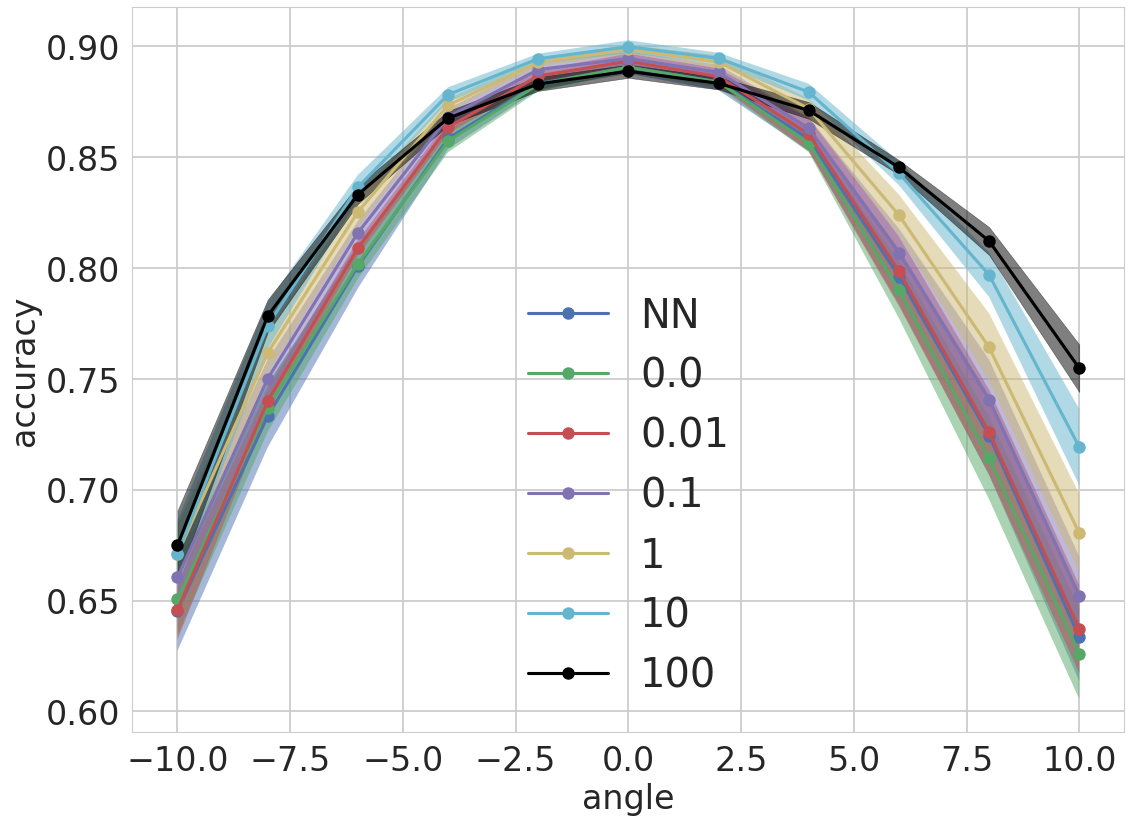

In [20]:
z = z_list

plt.plot(z, NN_mean_acc, 'o-', label='NN')
plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, TP_L0_mean_acc, 'o-', label='0.0')
plt.fill_between(z, TP_L0_mean_acc+TP_L0_std_acc, TP_L0_mean_acc-TP_L0_std_acc, alpha=0.5)

plt.plot(z, TP_L001_mean_acc, 'o-', label='0.01')
plt.fill_between(z, TP_L001_mean_acc+TP_L001_std_acc, TP_L001_mean_acc-TP_L001_std_acc, alpha=0.5)

plt.plot(z, TP_L01_mean_acc, 'o-', label='0.1')
plt.fill_between(z, TP_L01_mean_acc+TP_L01_std_acc, TP_L01_mean_acc-TP_L01_std_acc, alpha=0.5)

plt.plot(z, TP_L1_mean_acc, 'o-', label='1')
plt.fill_between(z, TP_L1_mean_acc+TP_L1_std_acc, TP_L1_mean_acc-TP_L1_std_acc, alpha=0.5)

plt.plot(z, TP_L10_mean_acc, 'o-', label='10')
plt.fill_between(z, TP_L10_mean_acc+TP_L10_std_acc, TP_L10_mean_acc-TP_L10_std_acc, alpha=0.5)

plt.plot(z, TP_L100_mean_acc, 'o-', label='100', c='k')
plt.fill_between(z, TP_L100_mean_acc+TP_L100_std_acc, TP_L100_mean_acc-TP_L100_std_acc, alpha=0.5, color='k')


plt.xlabel('angle')
plt.ylabel('accuracy')
plt.legend()
plt.show()


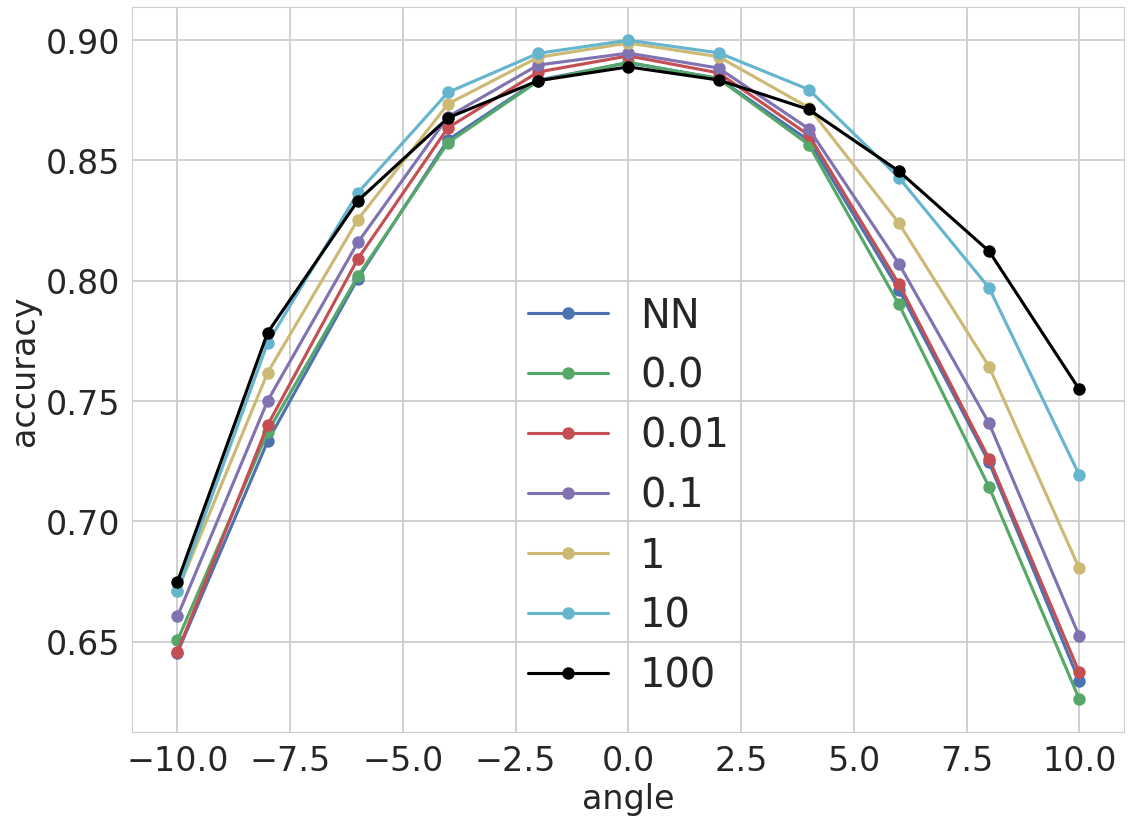

In [21]:
z = z_list

plt.plot(z, NN_mean_acc, 'o-', label='NN')
# plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, TP_L0_mean_acc, 'o-', label='0.0')
# plt.fill_between(z, TP_L0_mean_acc+TP_L0_std_acc, TP_L0_mean_acc-TP_L0_std_acc, alpha=0.5)

plt.plot(z, TP_L001_mean_acc, 'o-', label='0.01')
# plt.fill_between(z, TP_L001_mean_acc+TP_L001_std_acc, TP_L001_mean_acc-TP_L001_std_acc, alpha=0.5)

plt.plot(z, TP_L01_mean_acc, 'o-', label='0.1')
# plt.fill_between(z, TP_L01_mean_acc+TP_L01_std_acc, TP_L01_mean_acc-TP_L01_std_acc, alpha=0.5)

plt.plot(z, TP_L1_mean_acc, 'o-', label='1')
# plt.fill_between(z, TP_L1_mean_acc+TP_L1_std_acc, TP_L1_mean_acc-TP_L1_std_acc, alpha=0.5)

plt.plot(z, TP_L10_mean_acc, 'o-', label='10')
# plt.fill_between(z, TP_L10_mean_acc+TP_L10_std_acc, TP_L10_mean_acc-TP_L10_std_acc, alpha=0.5)

plt.plot(z, TP_L100_mean_acc, 'o-', label='100', color='k')
# plt.fill_between(z, TP_L100_mean_acc+TP_L100_std_acc, TP_L100_mean_acc-TP_L100_std_acc, alpha=0.5)


plt.xlabel('angle')
plt.ylabel('accuracy')
plt.legend()
plt.show()


# Losses

In [22]:
# NN_models = load_models(NeuralNetModel, n_steps=10000, batch_size=128, cuda=True)
# TP_L0_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.0, 
#                              batch_size=128, n_steps=10000, cuda=True )
# TP_L001_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.01, 
#                              batch_size=128, n_steps=10000, cuda=True )


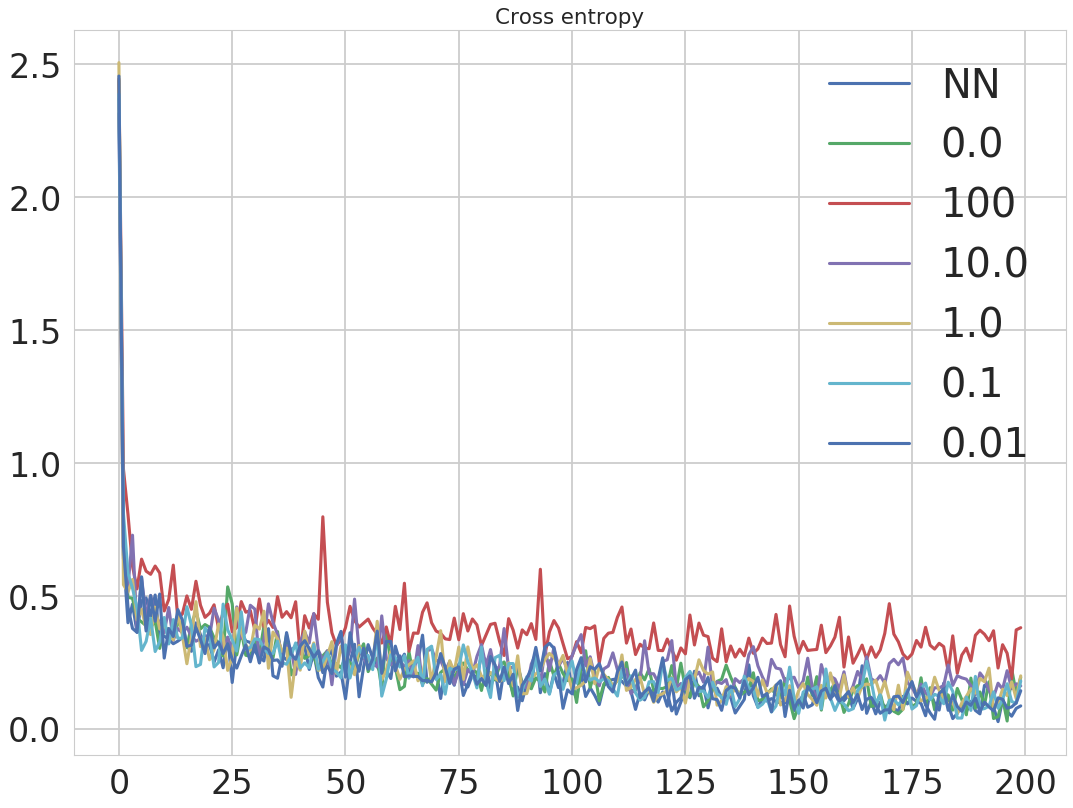

In [23]:
i = 0
plt.plot(NN_models[i].loss_hook.losses[::50], label='NN')
plt.plot(TP_L0_models[i].loss_hook.losses[::50], label='0.0')
plt.plot(TP_L100_models[i].loss_hook.losses[::50], label='100')
plt.plot(TP_L10_models[i].loss_hook.losses[::50], label='10.0')
plt.plot(TP_L1_models[i].loss_hook.losses[::50], label='1.0')
plt.plot(TP_L01_models[i].loss_hook.losses[::50], label='0.1')
plt.plot(TP_L001_models[i].loss_hook.losses[::50], label='0.01')
plt.title('Cross entropy')
plt.legend()
plt.show()

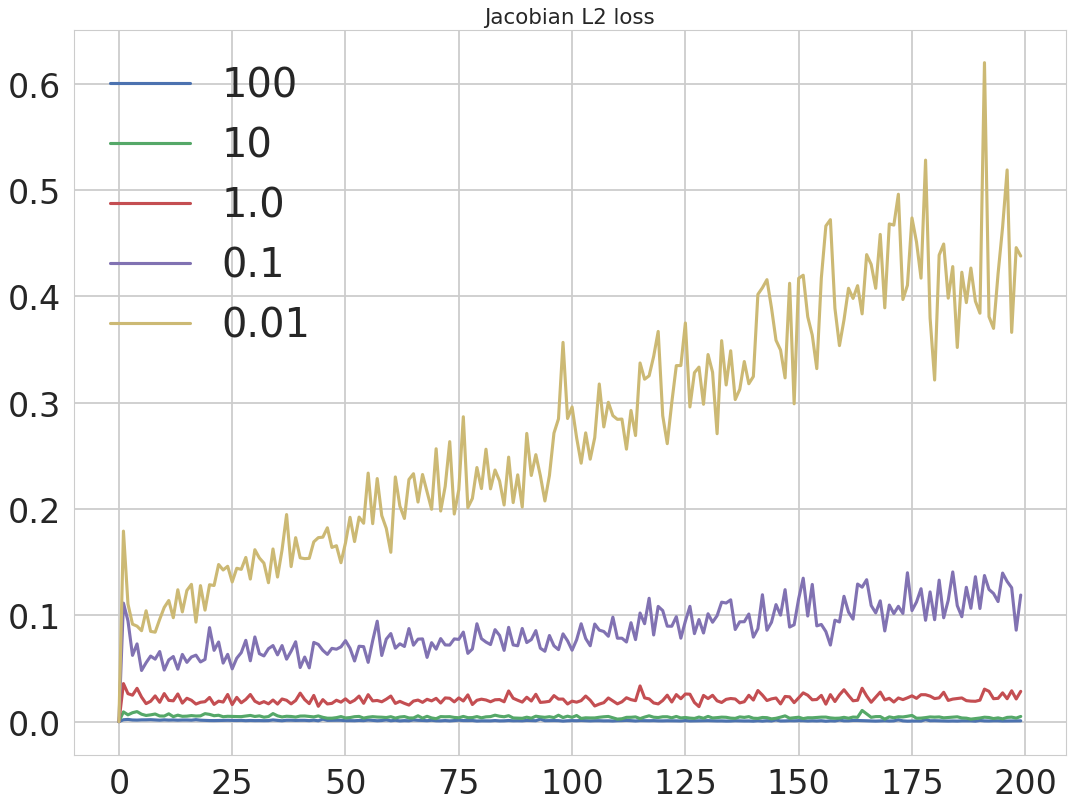

In [24]:
i = 0
plt.plot(TP_L100_models[i].jloss_hook.losses[::50], label='100')
plt.plot(TP_L10_models[i].jloss_hook.losses[::50], label='10')
plt.plot(TP_L1_models[i].jloss_hook.losses[::50], label='1.0')
plt.plot(TP_L01_models[i].jloss_hook.losses[::50], label='0.1')
plt.plot(TP_L001_models[i].jloss_hook.losses[::50], label='0.01')
plt.title('Jacobian L2 loss')
plt.legend()
plt.show()

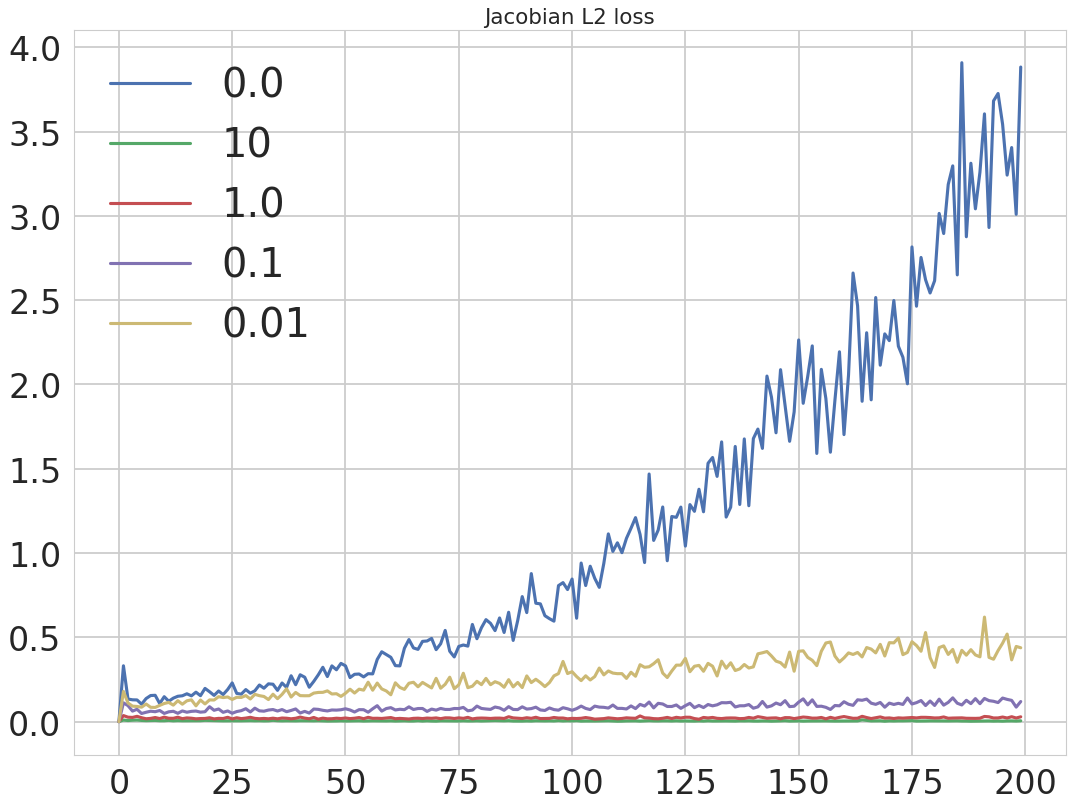

In [25]:
plt.plot(TP_L0_models[0].jloss_hook.losses[::50], label='0.0')
plt.plot(TP_L10_models[0].jloss_hook.losses[::50], label='10')
plt.plot(TP_L1_models[0].jloss_hook.losses[::50], label='1.0')
plt.plot(TP_L01_models[0].jloss_hook.losses[::50], label='0.1')
plt.plot(TP_L001_models[0].jloss_hook.losses[::50], label='0.01')
plt.title('Jacobian L2 loss')
plt.legend()
plt.show()

# Playground

In [ ]:
# i = 0
# m = models[i]
# cv_iter = get_cv_iter(X, y)
# idx_dev, idx_valid = cv_iter[i]
# X_test = X[idx_valid]
# y_test = y[idx_valid]
# acc = accuracy_score(y_test, m.predict(X_test))

# print(acc)


In [ ]:
# XX = skew(X_test, z=80)
# y_pred = m.predict(XX)
# acc = accuracy_score(y_test, m.predict(XX))
# print(acc)

# i = np.random.randint(0, XX.shape[0])
# plt.imshow(XX[i].reshape(28,28))

# plt.title('label = {}<->truth = {}'.format(y_pred[i], y_test[i]))
# plt.show()

# plt.imshow(X_test[i].reshape(28,28))
# plt.show()


In [ ]:
# X_test.shape

In [ ]:
# from myNNDA import data_augment

In [ ]:
# XX = X[:200]
# yy = y[:200]
# XX2, yy, _ = data_augment(XX, yy, None)

In [ ]:
# i = 67
# x = XX2[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('skewed')
# plt.show()
# x = XX[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('original')
# plt.show()